<a href="https://colab.research.google.com/github/rafaelmgr12/UNIVESP-AlgeProg2/blob/master/Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 6

# Setup Google Colab

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook...........\n\n")
    ! shred -u ch11.py
    ! shred -u w3c.html
    ! wget https://raw.githubusercontent.com/rafaelmgr12/UNIVESP-AlgeProg2/master/programs/w3c.html
    ! wget https://raw.githubusercontent.com/rafaelmgr12/UNIVESP-AlgeProg2/master/programs/ch11.py 


## Conceitos fundamentais da Web

### WWW e Internet



A Internet é uma rede global que conecta
computadores ao redor do globo. Permite a
troca de mensagens entre programas
conectados a ela.

A World Wide Web (WWW ou simplesmente
Web) é um sistema distribuído de documentos
ligados por hiperlinks e armazenados em
servidores Web espalhados pela Internet.

### Servidor e cliente



A comunicação entre programas tipicamente
ocorre quando um dos programas requisita
um recurso a outro programa.

O provedor do recurso é chamado de servidor
Web e quem requisita/recebe o recurso é
chamado de cliente.

O navegador é um cliente Web, e além de
requisitar um recurso, também processa o
recurso, exibindo o conteúdo na tela.

### URL



Para fazer a requisição de um recurso, é
necessário:
-Identificar o recurso
-Localizar o recurso
-Usar uma linguagem padronizada de
comunicação
A Web oferece funcionalidades para identificar
e localizar um recurso, além de um protocolo
de comunicação que permite a troca de
mensagens entre cliente e servidor.

A URL (Uniform Resource Locator) oferece um
identificador único para cada recurso na Web,
definindo também sua localização e o
protocolo de comunicação.
Exemplo:

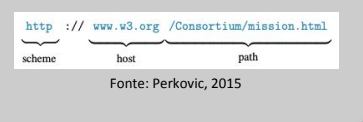

### Scheme



O esquema define como acessar o recurso. No
exemplo anterior, usamos o protocolo HTTP.
Existem outros protocolos conhecidos:
- HTTPS
- FTP
- MAILTO
- FILE
- etc.

### Host



O host é o nome do servidor que armazena o
recurso/documento.

O host é transformado em um endereço IP a
partir de uma consulta a um servidor de
nomes (DNS), realizada pelo cliente.

Tanto o hostname como o IP são únicos e
localizam o servidor na rede.

### Path



O path em uma URL especifica o caminho
relativo do recurso a partir de um diretório
predefinido (diretório raiz do servidor Web).

Uma vez localizado o servidor, é necessário
especificar em qual subdiretório do servidor o
recurso se encontra.

### HTTP

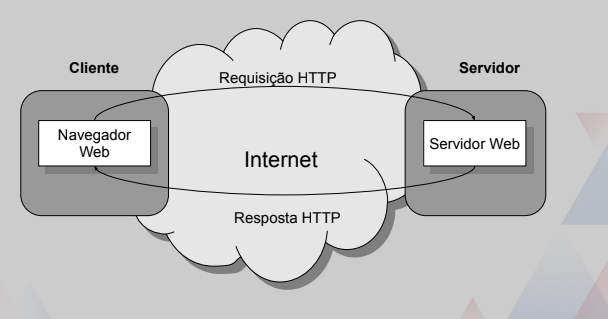

Padrão de mensagens requisição/resposta
entre cliente e servidor
Por padrão, usam-se conexões TCP/IP na
porta 80
Mensagem típica de requisição:

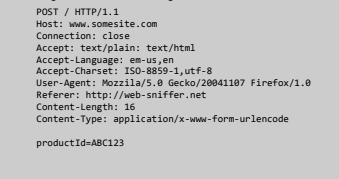

Mensagem típica de resposta:

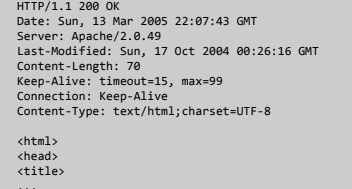

** Fluxo de requisições **

Passos para requisição de uma página Web

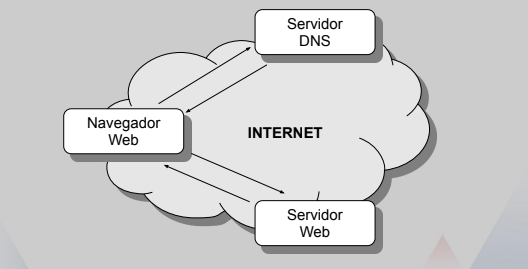

## HTML e JSON

###Intercâmbio de dados



A troca de informações entre diferentes
aplicações permite que programas sejam bem
aceitos e difundidos.
Para viabilizar essa comunicação, é
necessário que as aplicações sigam
determinados padrões previamente
especificados.
Nesta videoaula, veremos dois padrões
bastante conhecidos: HTML e JSON.

### HTML

Na aula anterior, vimos o conteúdo de uma típica
troca de mensagens entre cliente e servidor
usando o protocolo HTTP:

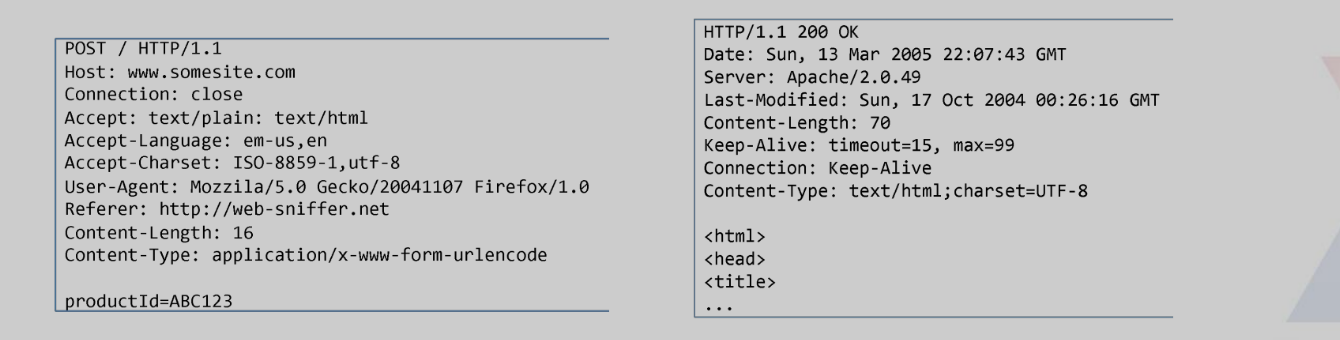

Se o cliente for um navegador Web será capaz
de interpretar o conteúdo da resposta,
apresentando-o na tela de maneira formatada.

Além do conteúdo em si, uma página Web
contém elementos que definem o layout,
cabeçalhos, imagens, vídeos, hiperlinks, etc.
Exemplo:

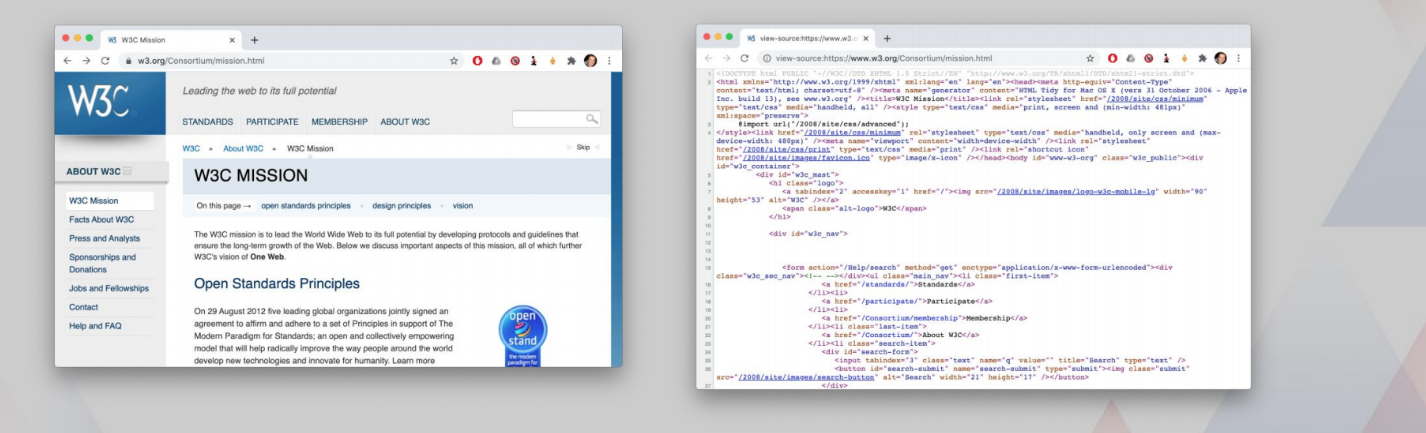

**HTML (HyperText Markup Language)** é uma
linguagem que permite definir cabeçalhos,
listas, imagens, vídeos, hiperlinks, etc. em
uma página Web.
Utilizam-se elementos HTML, cada um com
uma função específica.
Um elemento possui o seguinte formato:
```
<nome_tag atributo="valor">conteudo</nome_tag>
```

Exemplo

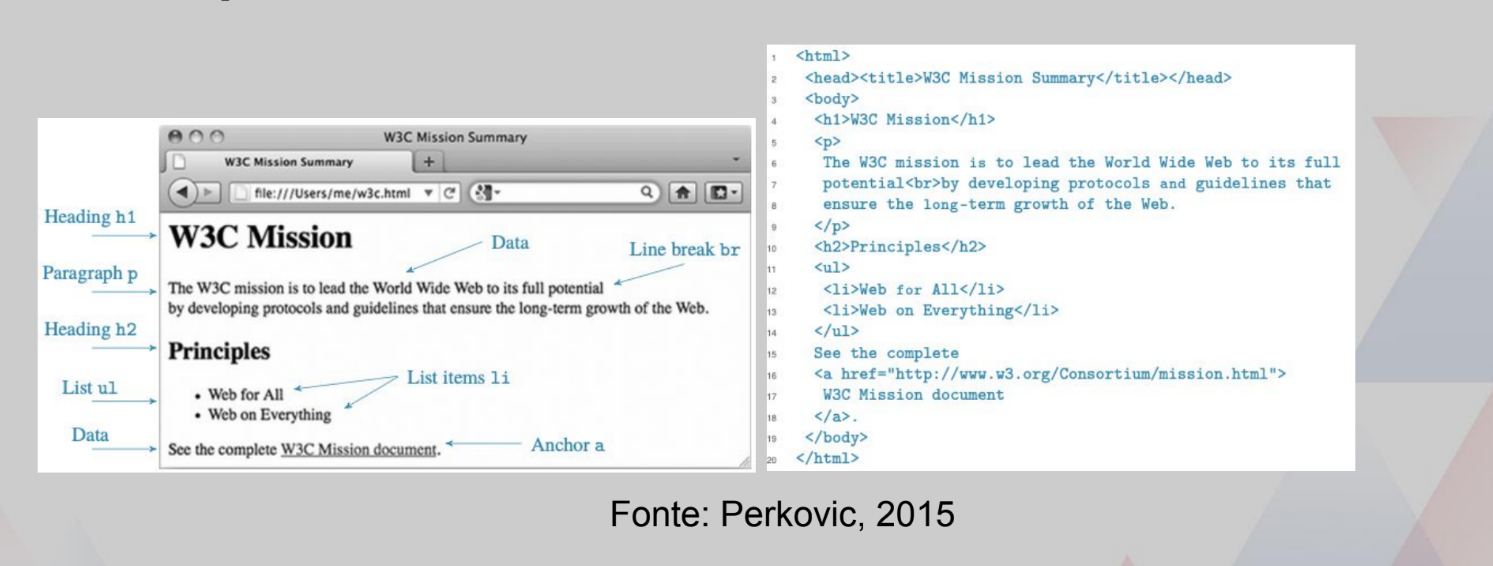

Um elemento pode estar contido em outro
elemento: aparece entre as tags de início e
fim.

```
<head><title>W3C Mission
Summary</title></head>
```

Os elementos de um documento HTML
formam uma árvore hierárquica, como
veremos a seguir.

Um elemento âncora serve para criar textos de
hiperlink:

```
<a href="URL">Texto de hiperlink</a>
```

onde "URL" é o endereço (relativo ou
absoluto) do recurso que foi ancorado.

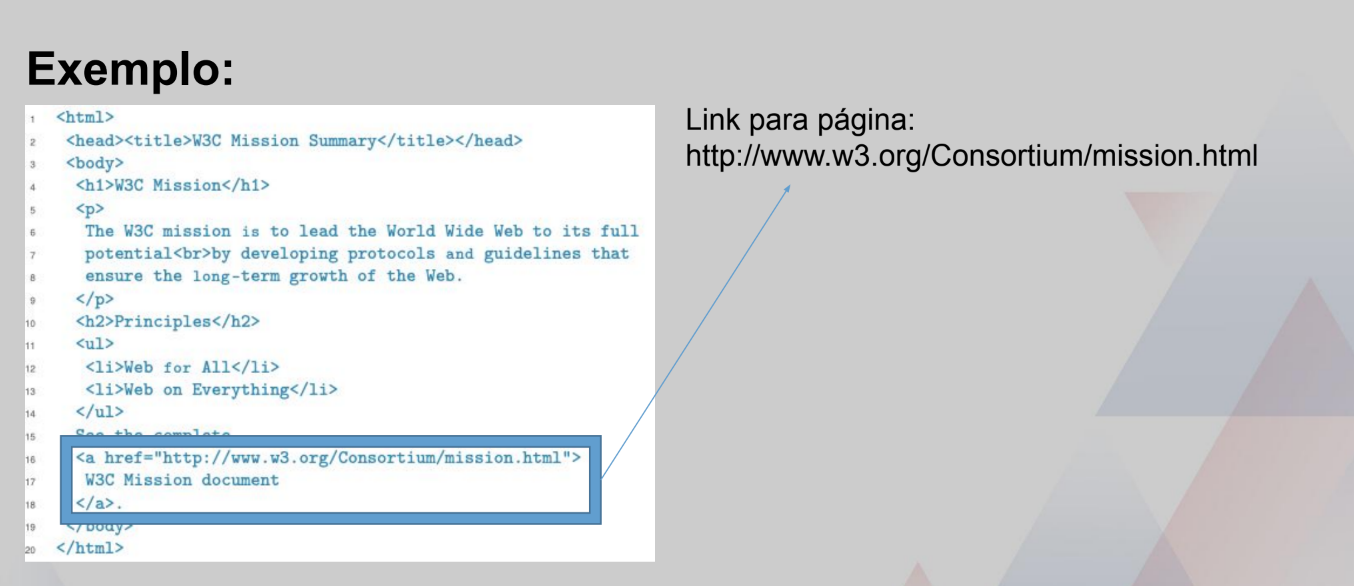

###JSON

JSON (JavaScript Object Notation) define um
formato padrão para descrever, em formato
texto, objetos como dicionários, listas,
números e strings.

A maioria das linguagens de programação
possui bibliotecas para produzir e processar
dados no formato JSON.

O módulo json da biblioteca padrão contém funções
para codificar objetos Python em JSON e vice-versa.
Exemplo:


In [ ]:
import json
d = dict() 

d['a'] = 1 
d['b'] = 2 
d['c'] = [3,4] 
jd = json.dumps(d) 
jd


In [ ]:
dd = json.loads(jd)
dd

In [ ]:
type(dd)

In [ ]:
type(jd)

## Python WWW API

Nas duas aulas anteriores vimos:
- Fundamentos da Web, incluindo URL, HTTP
e HTML
- Intercâmbio de dados por meio de
padronizações (HTML e JSON)

Nesta aula, veremos alguns módulos da
biblioteca padrão Python para acessar e
processar recursos da Web.

### Módulo urllib.request



O módulo urllib.request permite requisitar e
receber recursos da Web, de modo similar a
um navegador.
A função urlopen():
- recebe como parâmetro uma URL
- formula uma requisição HTTP que será
enviada ao servidor especificado na URL
- obtém e retorna uma resposta HTTP
completa do servidor.

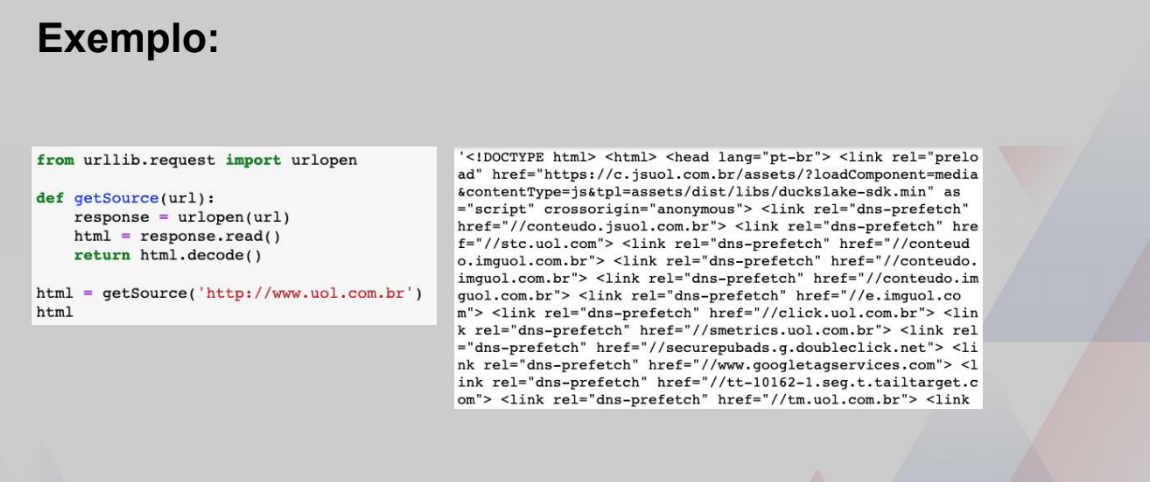

### Módulo html.parser

O módulo html.parser, por meio da classe
HTMLParser, permite processar elementos HTML de
uma página Web.

O método feed() da classe HTMLParser recebe
como entrada uma página HTML no formato string,
e para cada 'token' lido (tags de início, tags de fim,
texto, etc.), executa um handler correspondente.

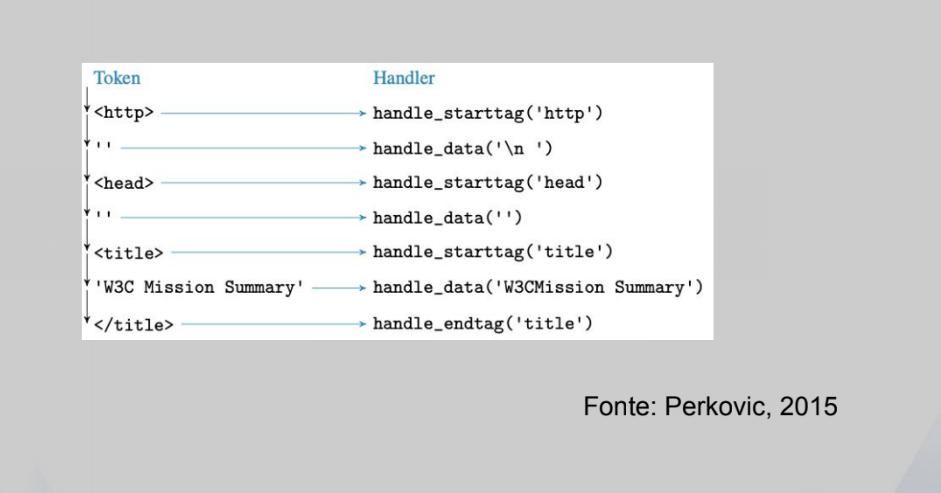

Inicialmente, cada handler é implementado para
não fazer nada. Assim, executamos o código
abaixo, o qual não gera nenhuma saída visível:

```
from html.parser import HTMLPARSER

parser = HTMLPARSER()
Parser.feed(html)
```

Para trazer funcionalidade a um determinado
handler, precisamos sobrescrever o método
correspondente, estendendo a classe
HTMLParser.

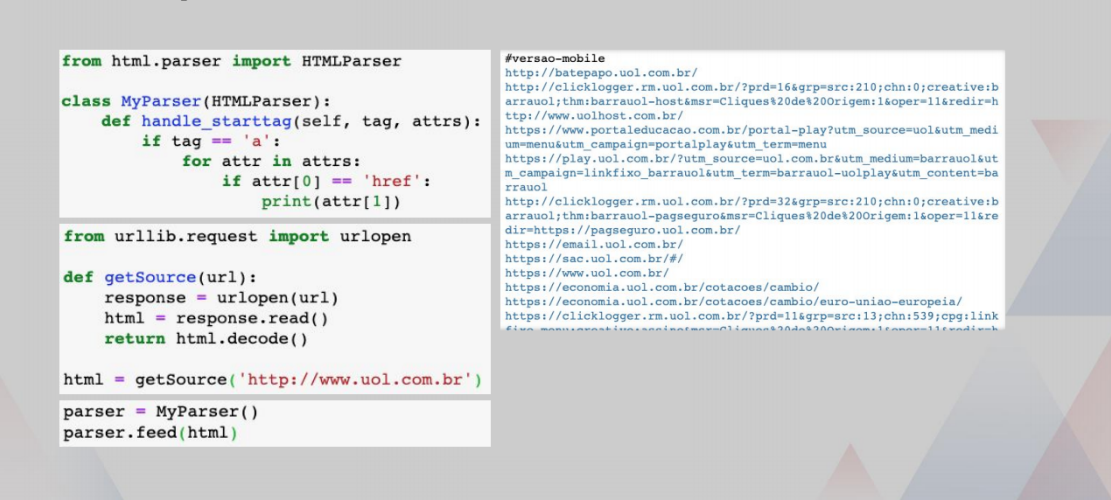

### Exemplo
Retornar o número de polos de um determinado
curso da UNIVESP.

In [ ]:
from html.parser import HTMLParser
from urllib.request import urlopen, Request


class MyParser(HTMLParser):
  def __init__(self):
    HTMLParser.__init__(self)
    self.n_polos = 0
  def handle_starttag(self, tag, attrs):
    if tag == 'p':
      for attr in attrs:
        if attr[0] == 'class' and attr[1] == 'item-polos':
          self.n_polos += 1
  def num_polos(self):
    return self.n_polos


###Outro exemplo



Retornar o número de polos de um determinado
curso da UNIVESP.




In [ ]:
def getSource(url):
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
  reg_url = "https:XXXXOOOO"
  req = Request(url=url, headers=headers)
  html = urlopen(req).read()
  return html.decode()

html = getSource('https://univesp.br/cursos/engenharia-de-computacao')
parser = MyParser()
parser.feed(html)
parser.num_polos()


## Exercícios de apoio

Problema Prático 11.1


Escreva o método news() que aceita um URL de um site Web de notícias e uma lista de tópicos de notícias (ou seja, strings) e calcula o número de ocorrências de cada tópico nas notícias.
```
news('http://bbc.co.uk',['economy','climate','education'])
```

economy appears 3 times.

climate appears 3 times.

education appears 1 times.

In [ ]:
from urllib.request import urlopen
def news(url, topics):
    '''conta no recurso com URL url a frequência
       de cada tópico na lista topics '''
    response = urlopen(url)
    html = response.read()
    content = html.decode().lower()
    for topic in topics:
      n = content.count(topic)
      print('{} appears {} times.'.format(topic,n))

news('http://bbc.co.uk',['economy','climate','education'])

In [ ]:
news('http://bbc.co.uk',['lockdown','covid-19','vote'])

Problema Prático 11.2

Desenvolva a classe MyHTMLParser como uma subclasse de HTMLParser que, quando alimentada com um arquivo HTML, mostra os nomes das tags de início e fim na ordem em que aparecem no documento, e com um recuo proporcional à profundidade do elemento na estrutura de árvore do documento. Ignore os elementos HTML que não exigem uma tag de fim, como p e br.

Arquivo: w3c.html
```
infile = open('w3c.html')
content = infile.read()
infile.close()
myparser = MyHTMLParser()
myparser.feed(content)
```
html start

    head start

        title start

        title end

    head end

    body start

        h1 start

        h1 end

        h2 start

        h2 end

        ul start

            li start

...

        a end

    body end

html end

In [ ]:
from html.parser import HTMLParser
class MyHTMLParser(HTMLParser):
  
  def __init__(self):
    HTMLParser.__init__(self)
    self.indent = 0 #valor da identação inicial

  def handle_startga(self,tag,attrs):
    if tag not in {"br","p"}:
      print('{}{} start'.format(self.indent*' ', tag))
      self.indent += 4

  def handle_endtag(self, tag):
    '''mostra tag de fim com endentação proporcional à
     profundidade do elemento da tag no documento'''
    if tag not in {'br','p'}:
      self.indent -= 4
      print('{}{} end'.format(self.indent*' ', tag))

In [ ]:
infile = open('w3c.html')
content = infile.read()
infile.close()
myparser = MyHTMLParser()
myparser.feed(content)

Problema Prático 11.3

Aumente a classe Collector de modo que ela também colete todos os dados de texto em uma string que pode ser recuperada usando o método getData().
```
url = 'http://www.w3.org/Consortium/mission.html'

resource = urlopen(url)

content = resource.read().decode()

collector = LinksCollector(url)

collector.feed(content)
collector.getData()

'\nW3C Mission\n ...'
```
(Somente os primeiros caracteres são apresentados.)

In [ ]:
from urllib.parse import urljoin
from html.parser import HTMLParser


class Collector(HTMLParser):
    'coleta URLs de hyperklink em uma lista'

    def __init__(self, url):
        'inicializa analisador, o URL e uma lista'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []
        self.text = []

    def handle_starttag(self, tag, attrs):
        'coleta URLs de hyperlink em sua forma absoluta'
        if tag == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    # constrói URL absoluto
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http':  # coleta URLs HTTP
                        self.links.append(absolute)

    def getLinks(self):
        'retorna URLs de hyperlink em seu formato absoluto'
        return self.links
    
    def handle_data(self,data):
      self.text += data

    def getData(self):
      return self.text

In [ ]:
url = 'http://www.w3.org/Consortium/mission.html'
 
resource = urlopen(url)
 
content = resource.read().decode()
 
collector = Collector(url)
 
collector.handle_data(content)
collector.getData()
 

Problema Prático 11.4

Cada um dos casos listados oferece uma expressão regular e um conjunto de strings. Selecione as strings que combinam com a expressão regular.

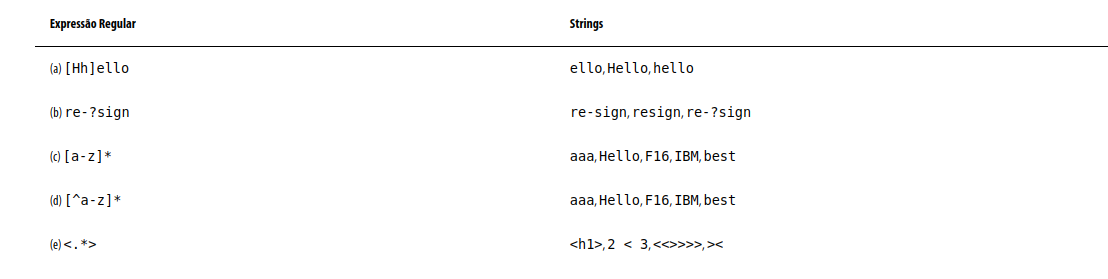

Como os operadores *, . e [ têm significado especial dentro de expressões regulares, elas não podem ser usadas para combinar com os caracteres '*', '.' ou '['. Para combinar com os caracteres com significado especial, a sequência de escape \ precisa ser usada. Assim, por exemplo, a expressão regular \*\[ combinaria com a string '*['. Além de servir como um identificador de sequência de escape, a contrabarra \ também pode sinalizar uma sequência especial de expressão regular. As sequências especiais de expressão regular representam conjuntos predefinidos de caracteres comumente usadas em conjunto. A Tabela 11.3 lista algumas sequências especiais de expressão regular.



**Resposta**
(a)Hello, hello

(b)'re-sign', 'resign'

(c)aaa, best

(d)F16, IBM

(e) < h1 >", <<>>>>



Problema Prático 11.5

Para cada uma das descrições de padrão informais listadas ou conjuntos de strings, defina uma expressão regular que se ajuste à descrição de padrão ou combine com todas as strings no conjunto e nenhuma outra.

(a)aac, abc, acc.

(b)abc, xyz.

(c)a, ab, abb, abbb, abbbb,…

(d)Strings não vazias consistindo em letras minúsculas no alfabeto (a, b, c,…, z).

(e)Strings contendo a substring oe.

(f)String representando uma tag HTML de início ou fim.

**Resposta** 
(a)a[abc]c

(b)abc|xyz

(c)a[b]*

(d)[a-z]+

(e)[a-zA-Z]*oe[a-zA-Z]*

(f)<[^>]*>



Problema Prático 11.6

Desenvolva a função frequency(), que toma uma string como entrada, calcula a frequência de cada palavra na string e retorna um dicionário que mapeia palavras na string à sua frequência. Você deverá usar uma expressão regular para obter a lista de todas as palavras na string.
```
content = 'The pure and simple truth is rarely pure and never\
         simple.'
frequency(content)
```

{'and': 2, 'pure': 2, 'simple': 2, 'is': 1, 'never': 1,
'truth': 1, 'The': 1, 'rarely': 1}

In [ ]:
import re
def frequency(content):
  pattern = '[a-zA-Z]+'
  words = re.findall(pattern, content)
  dictionary = {}
  for w in words:
    if w in dictionary:
      dictionary[w] +=1
    else:
      dictionary[w] = 1
  return dictionary

In [ ]:
content = 'The pure and simple truth is rarely pure and never\
         simple.'
frequency(content)